In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("ready_dataset_fromStep3.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339686 entries, 0 to 5339685
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ethnicity_race        object 
 1   applicant_sex         object 
 2   applicant_age         object 
 3   income                float64
 4   income_class          object 
 5   loan_to_value_ratio   float64
 6   debt_to_income_ratio  object 
 7   loan_amount           float64
 8   property_value        float64
 9   interest_rate         float64
dtypes: float64(5), object(5)
memory usage: 407.4+ MB


In [16]:
df.head()

,ethnicity_race,applicant_sex,applicant_age,income,income_class,loan_to_value_ratio,debt_to_income_ratio,loan_amount,property_value,interest_rate
0,White,Female,25-34,228000.0,Upper,76.471,30-40,655000.0,865000.0,5.000
1,White,Male,35-44,158000.0,Upper,90.000,40-50,785000.0,875000.0,5.375
2,White,Female,25-34,194000.0,Upper,80.000,40-50,705000.0,895000.0,6.500
3,White,Female,25-34,125000.0,Upper-middle,67.073,40-50,555000.0,825000.0,4.375
4,White,Female,25-34,179000.0,Upper,80.000,40-50,585000.0,735000.0,3.875


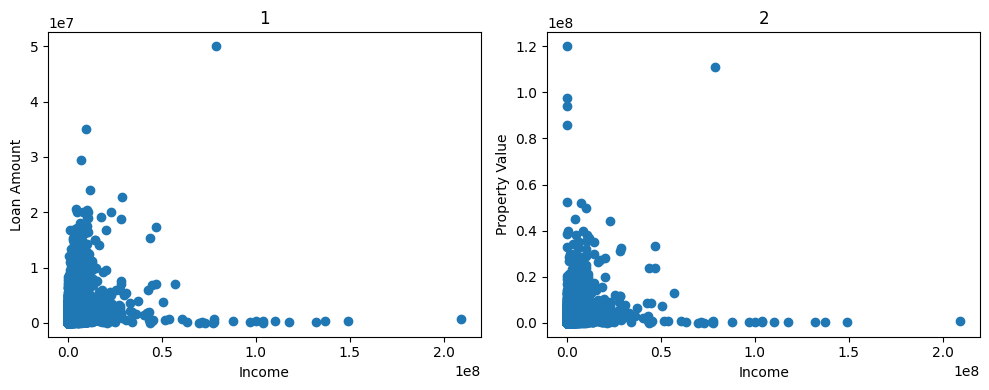

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(df['income'], df['loan_amount'])
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Loan Amount')
ax[0].set_title('1')

ax[1].scatter(df['income'], df['property_value'])
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Property Value')
ax[1].set_title('2')

plt.tight_layout()
plt.show()

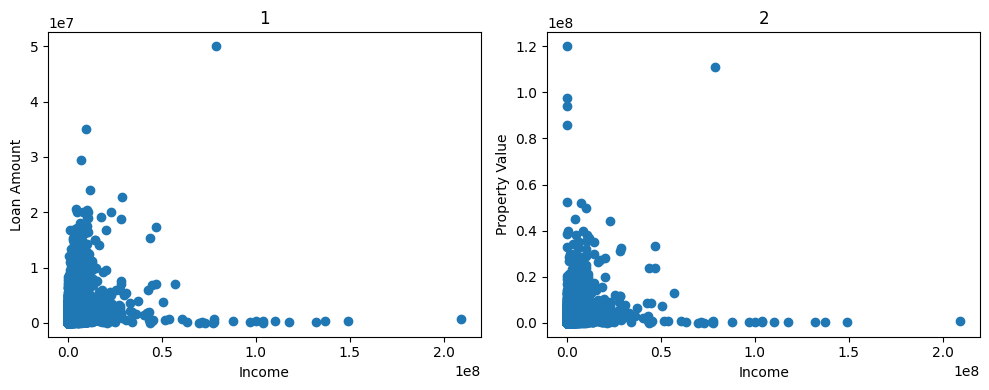

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].scatter(df['income'], df['loan_amount'])
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Loan Amount')
ax[0].set_title('1')

ax[1].scatter(df['income'], df['property_value'])
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Property Value')
ax[1].set_title('2')

plt.tight_layout()
plt.show()

In [19]:
df['income'].describe().round(1)

count      5339686.0
mean        163325.3
std         323781.8
min           1000.0
25%          78000.0
50%         120000.0
75%         185000.0
max      209300000.0
Name: income, dtype: float64

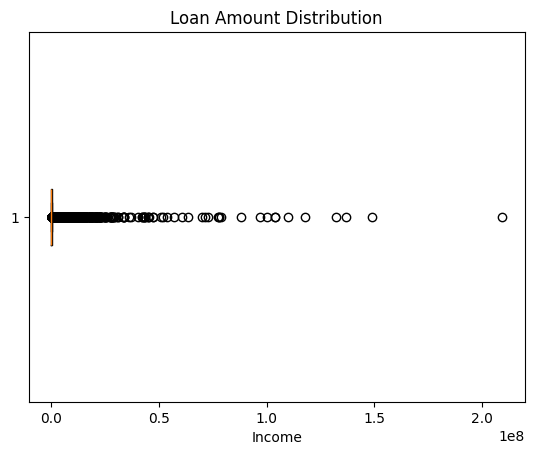

In [20]:
plt.figure()
plt.boxplot(df['income'], vert=False)
plt.xlabel('Income')
plt.title('Loan Amount Distribution')
plt.show()

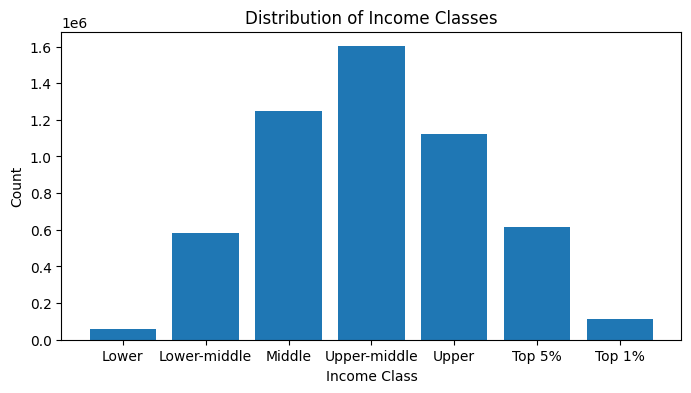

In [25]:
income_class_order = [
    'Lower', 'Lower-middle', 'Middle', 'Upper-middle', 'Upper', 'Top 5%', 'Top 1%'
]

df['income_class'] = pd.Categorical(
    df['income_class'],
    categories=income_class_order,
    ordered=True
)

income_class_counts = df['income_class'].value_counts(sort=False)

plt.figure(figsize=(8, 4))
plt.bar(income_class_counts.index, income_class_counts.values)
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.title('Distribution of Income Classes')
plt.show()

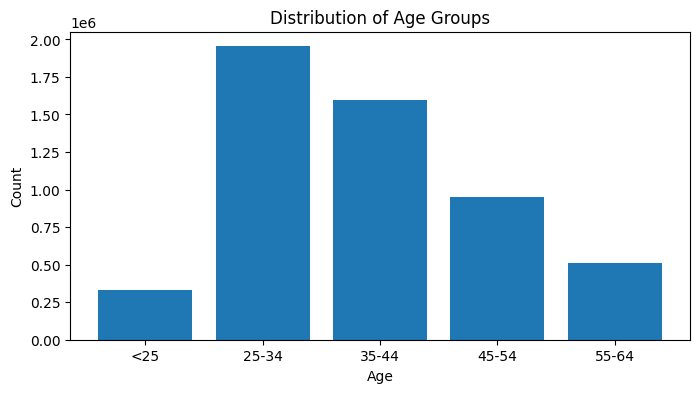

In [26]:
age_order = [
    '<25', '25-34', '35-44', '45-54', '55-64'
]

df['applicant_age'] = pd.Categorical(
    df['applicant_age'],
    categories=age_order,
    ordered=True
)

age_counts = df['applicant_age'].value_counts(sort=False)

plt.figure(figsize=(8, 4))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

In [27]:
df.groupby(by=['income_class', 'applicant_age']).count()[['interest_rate']]

/var/folders/v5/853tm03d4ds4l0z_4qjrndh40000gn/T/ipykernel_15209/268180369.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=['income_class', 'applicant_age']).count()[['interest_rate']]


interest_rate
income_class applicant_age               
Lower        <25                    11988
             25-34                  16475
             35-44                  12067
             45-54                  10192
             55-64                   9465
Lower-middle <25                   101283
             25-34                 220341
             35-44                 120727
             45-54                  83589
             55-64                  57161
Middle       <25                   120858
             25-34                 515729
             35-44                 306749
             45-54                 192941
             55-64                 112080
Upper-middle <25                    63270
             25-34                 644876
             35-44                 480471
             45-54                 269865
             55-64                 142219
Upper        <25                    19246
             25-34                 377773
             35-44                 391373
             45-54                 223101
             55-64                 109336
Top 5%       <25                     9787
             25-34                 160301
             35-44                 243322
             45-54                 139172
             55-64                  63386
Top 1%       <25                     2682
             25-34                  18082
             35-44                  43623
             45-54                  31933
             55-64                  14223